In [26]:

import pandas as pd
from kedro.config import ConfigLoader
from kedro.io import DataCatalog

In [2]:
from pathlib import Path

path = Path()
path.absolute()

WindowsPath('C:/respository/stock-market-forecast/notebooks')

In [3]:
# Initialise a ConfigLoader
conf_loader = ConfigLoader("../conf")

# Load the data catalog configuration from catalog.yml
conf_catalog = conf_loader.get("catalog.yml")

# Create the DataCatalog instance from the configuration
catalog = DataCatalog.from_config(conf_catalog)

C:\respository\stock-market-forecast\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
C:\respository\stock-market-forecast\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [4]:
# Load the dataset and print the output
djiStockData = catalog.load("nb_dji_stock")
djiStockData.head()

,Unnamed: 0,date,open,high,low,close,adjusted_close,volume
0,0,1950-01-03,198.89,198.89,198.89,198.89,198.89,0
1,1,1950-01-04,200.20,200.20,200.20,200.20,200.20,0
2,2,1950-01-05,200.57,200.57,200.57,200.57,200.57,0
3,3,1950-01-06,200.96,200.96,200.96,200.96,200.96,0
4,4,1950-01-07,201.94,201.94,201.94,201.94,201.94,0


In [5]:
djiStockData.head(5)

,Unnamed: 0,date,open,high,low,close,adjusted_close,volume
0,0,1950-01-03,198.89,198.89,198.89,198.89,198.89,0
1,1,1950-01-04,200.20,200.20,200.20,200.20,200.20,0
2,2,1950-01-05,200.57,200.57,200.57,200.57,200.57,0
3,3,1950-01-06,200.96,200.96,200.96,200.96,200.96,0
4,4,1950-01-07,201.94,201.94,201.94,201.94,201.94,0


In [6]:
tweetData = catalog.load("nb_dji_tweets")

In [7]:
tweetData.head(-5)

,Unnamed: 0,date,count,normalized
0,0,2022-12-26,12,0.3424
1,1,2022-12-25,7,0.3077
2,2,2022-12-24,2,-0.5678
3,3,2022-12-23,16,0.1991
4,4,2022-12-22,6,0.3884
...,...,...,...,...
321,321,2021-12-30,57,-0.3214
322,322,2021-12-29,52,-0.2934
323,323,2021-12-28,59,-0.2321
324,324,2021-12-27,55,-0.2837


In [8]:
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  331 non-null    int64  
 1   date        331 non-null    object 
 2   count       331 non-null    int64  
 3   normalized  331 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.5+ KB


In [9]:
df_merge = pd.merge(djiStockData, tweetData, how='inner', on='date')

In [10]:
df_merge["pct_change"] = df_merge['adjusted_close'].shift(1) / df_merge['adjusted_close'] - 1
df_merge['direction'] = df_merge['pct_change'].apply(lambda x: 1 if x > 0 else 0)
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge.set_index('date', inplace=True)
df_merge['direction'] = df_merge['direction'].shift(1)
df_merge.dropna(inplace=True)

In [11]:
df_merge.head()

,Unnamed: 0_x,open,high,low,close,adjusted_close,volume,Unnamed: 0_y,count,normalized,pct_change,direction
date,,,,,,,,,,,,
2021-12-22,16138,35491.71,35764.67,35433.13,35753.89,35753.89,290725286,329,58,-0.3296,-0.007305,0.0
2021-12-23,16139,35782.42,36060.99,35782.42,35950.56,35950.56,250941712,328,57,-0.1820,-0.005471,0.0
2021-12-27,16140,35954.48,36306.61,35954.48,36302.38,36302.38,250260983,324,55,-0.2837,-0.009691,0.0
2021-12-28,16141,36302.99,36527.26,36302.99,36398.21,36398.21,239087792,323,59,-0.2321,-0.002633,0.0
2021-12-29,16142,36421.14,36571.55,36396.19,36488.63,36488.63,214403952,322,52,-0.2934,-0.002478,0.0


In [12]:
df_merge.columns

Index(['Unnamed: 0_x', 'open', 'high', 'low', 'close', 'adjusted_close',
       'volume', 'Unnamed: 0_y', 'count', 'normalized', 'pct_change',
       'direction'],
      dtype='object')

In [13]:
X = df_merge.loc[:, ['open', 'high', 'low', 'adjusted_close', 'volume', 'count', 'normalized']]
y = df_merge.loc[:, 'direction']

In [14]:
X.shape, y.shape

((231, 7), (231,))

In [15]:
X_train, X_test = X.iloc[:200, :], X.iloc[200:, :]
y_train, y_test = y.iloc[:200], y.iloc[200:]

In [16]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [17]:
print(f'Train: {X_train.shape} {y_train.shape}')
print(f'Test: {X_test.shape} {y_test.shape}')

Train: (200, 7) (200,)
Test: (31, 7) (31,)


### Tensorflow

In [52]:
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Normalize/standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the output labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print(f'Accuracy: {scores[1]:.2f}')

Epoch 1/100
6/6 [==============================] - 0s 42ms/step - loss: 0.7666 - accuracy: 0.5389 - val_loss: 0.7145 - val_accuracy: 0.4500
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7460 - accuracy: 0.5333 - val_loss: 0.7133 - val_accuracy: 0.4500
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7390 - accuracy: 0.5056 - val_loss: 0.7129 - val_accuracy: 0.4500
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5389 - val_loss: 0.7118 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7167 - accuracy: 0.5222 - val_loss: 0.7117 - val_accuracy: 0.4500
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7146 - accuracy: 0.4778 - val_loss: 0.7109 - val_accuracy: 0.5000
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.4944 - val_loss: 0.7124 - val_accuracy: 0.5000
Epoch 8/100
6/6 [=========

### Confusion Matrix Heatmap
A graphical representation of the confusion matrix, showing the distribution of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) in your model's predictions.

Explanation: The heatmap displays the number of instances for each combination of true and predicted labels. The diagonal elements represent the correct predictions (TP and TN), while the off-diagonal elements represent the incorrect predictions (FP and FN). A well-performing model will have higher values along the diagonal and lower values in the off-diagonal elements.

1/1 [==============================] - 0s 11ms/step
Confusion Matrix:
 [[16  0]
 [13  2]]


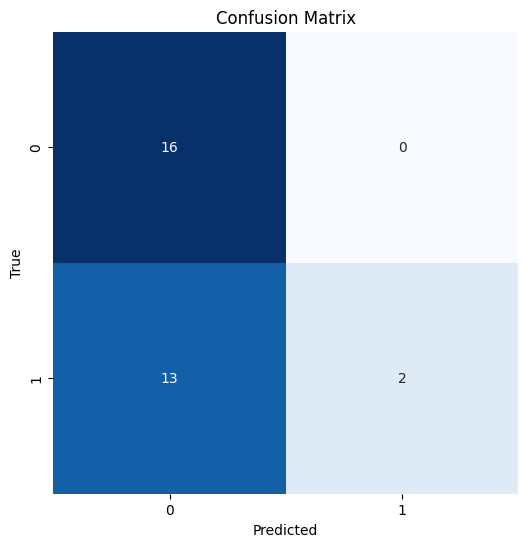

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_int = (model.predict(X_test) > 0.5).astype("int32")
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_int)
print('Confusion Matrix:\n', cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Model Training History
A visualization of the model's training progress, showing how the loss and accuracy (or other metrics) evolve over the training epochs.

Epoch 1/500
6/6 [==============================] - 0s 7ms/step - loss: 0.4034 - accuracy: 0.8000 - val_loss: 1.0431 - val_accuracy: 0.5500
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4006 - accuracy: 0.8111 - val_loss: 1.0526 - val_accuracy: 0.5500
Epoch 3/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 0.7444 - val_loss: 1.0545 - val_accuracy: 0.5500
Epoch 4/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4400 - accuracy: 0.7833 - val_loss: 1.0366 - val_accuracy: 0.5500
Epoch 5/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.7722 - val_loss: 1.0320 - val_accuracy: 0.5500
Epoch 6/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.7333 - val_loss: 1.0325 - val_accuracy: 0.5500
Epoch 7/500
6/6 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.7722 - val_loss: 1.0126 - val_accuracy: 0.5500
Epoch 8/500
6/6 [==========

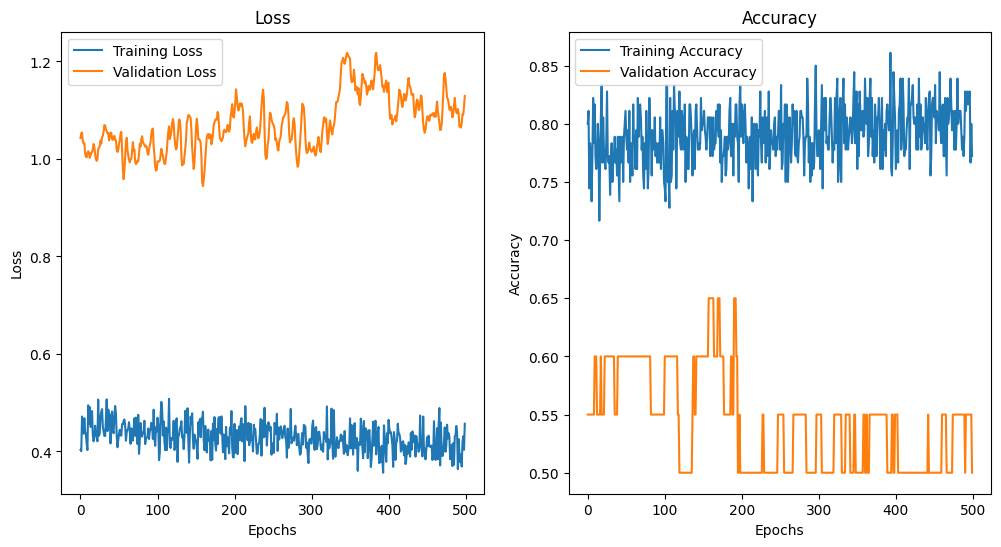

In [91]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1)

# Plot loss and accuracy during training
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Loss plot
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Accuracy plot
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

### Accuracy
The proportion of correctly classified instances out of the total instances. It's a commonly used metric but can be misleading in imbalanced datasets.

In [92]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, cohen_kappa_score, log_loss

accuracy = accuracy_score(y_test, y_pred_int)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


### Precision
The proportion of true positive instances out of the total predicted positive instances. It measures the model's ability to correctly identify positive instances.

In [93]:
precision = precision_recall_fscore_support(y_test, y_pred_int, average='binary')[0]
print(f'Precision: {precision:.2f}')

Precision: 0.00


C:\respository\stock-market-forecast\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Recall (Sensitivity or True Positive Rate)
The proportion of true positive instances out of the total actual positive instances. It measures the model's ability to identify all the positive instances.

In [94]:
recall = precision_recall_fscore_support(y_test, y_pred_int, average='binary')[1]
print(f'Recall: {recall:.2f}')

Recall: 0.00


C:\respository\stock-market-forecast\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### F1 Score
The harmonic mean of precision and recall. It provides a balance between precision and recall, and it's especially useful when dealing with imbalanced datasets.

In [95]:
f1 = precision_recall_fscore_support(y_test, y_pred_int, average='binary')[2]
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.00


C:\respository\stock-market-forecast\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cohen's Kappa
A measure of agreement between two raters, adjusting for the agreement expected by chance. It's a more robust metric than accuracy, as it considers the possibility of a correct classification occurring by chance. A value of 1 indicates perfect agreement, while 0 indicates agreement equivalent to random chance.

In [98]:
from sklearn.metrics import cohen_kappa_score

# Flatten y_pred to a 1D array
y_pred_flat = y_pred_int.flatten()

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred_flat)
print(f"Cohen's Kappa: {kappa:.2f}")


AttributeError: module 'numpy' has no attribute 'int'

In [99]:
print(y_test)
print(y_pred_flat)

[1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Log Loss (Binary Cross-Entropy)
The logarithm of the likelihood of the true labels given the predicted probabilities. It's useful for models that output probabilities, as it evaluates how close the predicted probabilities are to the true labels. Lower values are better.

In [100]:
y_pred_probs = model.predict(X_test)
logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.2f}')

1/1 [==============================] - 0s 10ms/step
Log Loss: 0.90


### Precision-Recall Curve

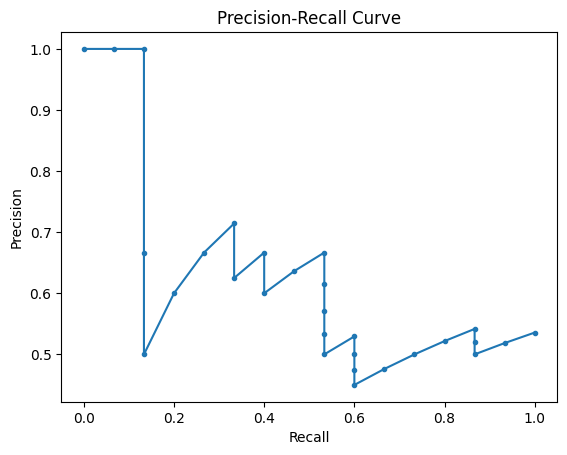

In [101]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### ROC Curve

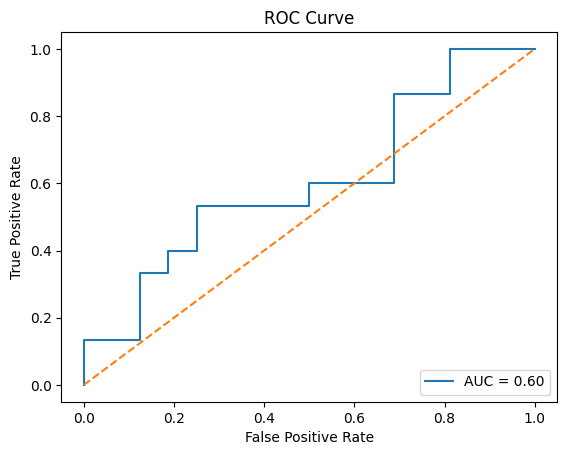

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

### Hyperparameter Tuning
Perform a search for the best hyperparameters, such as the number of hidden layers, number of neurons per layer, learning rate, batch size, and dropout rate. You can use grid search, random search, or more advanced methods like Bayesian optimization.

In our implementation, we perform hyperparameter tuning with Keras and scikit-learn using `GridSearchCV`


In [103]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(optimizer='adam', neurons=32, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameter search space
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'neurons': [16, 32, 64],
    'dropout_rate': [0.25, 0.5, 0.75]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Display the results
print(f'Best Score: {grid_result.best_score_:.2f}')
print(f'Best Parameters: {grid_result.best_params_}')

C:\Users\Vikra\AppData\Local\Temp\ipykernel_10156\1610150982.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
C:\respository\stock-market-forecast\venv\lib\site-packages\sklearn\base.py:88: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_object = klass(**new_object_params)


AttributeError: module 'numpy' has no attribute 'int'

In [30]:
# IL: create confusion matrix.
from keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.preprocessing import LabelEncoder


def mlalgo(X_train, X_test, y_train, y_test):
    # Encode the output labels
    encoder = LabelEncoder()
    y_train = encoder.fit_transform(y_train)

    # Build the model
    model = Sequential()
    model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Fit the mode (X,d) - Train and validation
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test)
    # print(f'Accuracy: {scores[1]:.2f}')
    return scores

In [31]:
X.head()

,open,high,low,adjusted_close,volume,count,normalized
date,,,,,,,
2021-12-22,35491.71,35764.67,35433.13,35753.89,290725286,58,-0.3296
2021-12-23,35782.42,36060.99,35782.42,35950.56,250941712,57,-0.1820
2021-12-27,35954.48,36306.61,35954.48,36302.38,250260983,55,-0.2837
2021-12-28,36302.99,36527.26,36302.99,36398.21,239087792,59,-0.2321
2021-12-29,36421.14,36571.55,36396.19,36488.63,214403952,52,-0.2934


In [32]:
sample_df = df_merge.copy()
sample_data = sample_df.resample('B').asfreq()
sample_data.fillna(method="ffill", inplace=True)

In [33]:
sample_data

,Unnamed: 0_x,open,high,low,close,adjusted_close,volume,Unnamed: 0_y,count,normalized,pct_change,direction
date,,,,,,,,,,,,
2021-12-22,16138.0,35491.7100,35764.6700,35433.1300,35753.8900,35753.8900,290725286.0,329.0,58.0,-0.3296,-0.007305,0.0
2021-12-23,16139.0,35782.4200,36060.9900,35782.4200,35950.5600,35950.5600,250941712.0,328.0,57.0,-0.1820,-0.005471,0.0
2021-12-24,16139.0,35782.4200,36060.9900,35782.4200,35950.5600,35950.5600,250941712.0,328.0,57.0,-0.1820,-0.005471,0.0
2021-12-27,16140.0,35954.4800,36306.6100,35954.4800,36302.3800,36302.3800,250260983.0,324.0,55.0,-0.2837,-0.009691,0.0
2021-12-28,16141.0,36302.9900,36527.2600,36302.9900,36398.2100,36398.2100,239087792.0,323.0,59.0,-0.2321,-0.002633,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-19,16386.0,32921.4492,33038.9414,32581.9707,32757.5391,32757.5391,326430000.0,7.0,13.0,0.2466,0.004974,1.0
2022-12-20,16387.0,32735.2402,32992.2305,32649.4492,32849.7383,32849.7383,303970000.0,6.0,10.0,-0.0499,-0.002807,1.0
2022-12-21,16388.0,33028.0898,33437.8398,33028.0898,33376.4805,33376.4805,328020000.0,5.0,18.0,0.2316,-0.015782,0.0


In [34]:
model

In [43]:
model.predict(X.loc['2022-12-20'])

ValueError: in user code:


    ValueError: Cannot iterate over a shape with unknown rank.


In [44]:
X.loc['2022-12-20':'2022-12-25']

,open,high,low,adjusted_close,volume,count,normalized
date,,,,,,,
2022-12-20,32735.2402,32992.2305,32649.4492,32849.7383,303970000,10,-0.0499
2022-12-21,33028.0898,33437.8398,33028.0898,33376.4805,328020000,18,0.2316
2022-12-22,33233.3516,33233.3516,32573.4297,33027.4883,340640000,6,0.3884
2022-12-23,32961.0586,33226.1406,32814.0195,33203.9297,221050000,16,0.1991


In [47]:
df_result = pd.DataFrame()
df_result['Date'] = X.loc['2022-12-20':'2022-12-25'].index
df_result['prediction'] = model.predict(X.loc['2022-12-20':'2022-12-30'])
# model.predict(X.loc['2022-12-20':'2022-12-25'])
df_result

,Date,prediction
0,2022-12-20,0.0
1,2022-12-21,0.0
2,2022-12-22,0.0
3,2022-12-23,0.0


In [46]:
X_train.iloc[25]

open              3.468619e+04
high              3.504779e+04
low               3.468619e+04
adjusted_close    3.498884e+04
volume            3.056666e+08
count             1.000000e+00
normalized        0.000000e+00
Name: 2022-02-15 00:00:00, dtype: float64

In [35]:
y

date
2021-12-22    0.0
2021-12-23    0.0
2021-12-27    0.0
2021-12-28    0.0
2021-12-29    0.0
             ... 
2022-12-19    1.0
2022-12-20    1.0
2022-12-21    0.0
2022-12-22    0.0
2022-12-23    1.0
Name: direction, Length: 231, dtype: float64

In [ ]:
# confusion matrix
# create a function which creates d col
# create additional matrix, binary cross-entropy, accuracy, prec-rec, f1, kappa
# area under the curve (ROC-AUC chart)
# plot x axis time - y axis - binary (0,1) - my pred Blue, actual value Red - if mine is wrong - we have 2 dots and if its correct we have one dot
# create validation set (passed to keras to fit func)